last updated:06/30/2018
# Challenges with Light Curves
by Ruben Santana

## Overview
If you have not looked at the Lightkurve Tutorial I recommend looking at that notebook first before continuing here. The notebook should be found in the same folder as this notebook.

In this notebook, you will be challenged to recreate similar functions used in the Lightkurve tutorial to smooth Kepler data. You will be given hints and tips on how to create the `.remove_nan()`,`.flatten()`,  and `.remove_outlier()`.

Now let's import the data.

In [1]:
%%capture
from lightkurve import KeplerTargetPixelFile
tpf = KeplerTargetPixelFile.from_archive("Kepler-8", quarter=2)
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc_norm = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).normalize()

In [2]:
# [place any imports needed here]
#For Plotting
import matplotlib.pyplot as plt
%matplotlib inline

## Creating .remove_nan()
When looking at Kepler you will often encounter gaps in the data where there is no measurement taken. These gaps in the data are usually caused by the spacecraft entering "safe mode". Safe modes are initiated for reasons such as turning spacecraft so that solar panels face the sun or to reset the instruments on the spacecraft.

## Challenge #1: Creating the .remove_nan()


Guideline:
1. Find a way to loop through the data and determine whether the point is in the flux array is NaN (Not a Number) value or not.

2. Find a way to remove the flux data point and the corresponding time data without removing any other values.

3. Return the new arrays with no NaN values

Helpful packages:
*  math.isnan(data_point) - checks if value is a NaN value

You do not have to follow the guideline but it's there to help give you an idea of how to start the function.

In [3]:
def remove_outlier(time,flux):
#     [CODE HERE]
    return() #return the NaN free array.

## Creating the .flatten()
This one to be the hardest and most important out of the three. The goal of this function will be to take in the flux from a signal quarter and remove any long frequency trends. These long term trends are usually caused by periodic star activity or by a drift in focus by the spacecraft. So flattening the data reduces the likelihood that these trends are mistaken for a planet.

One way to do this is by using something called detrending. Detrending is a process which takes a trace or finds the long-term trend of the data and subtracts it from the data. The trend can be found by using the running average or median of the flux. The running average creates a good trend of the data by removing the outliers and the transits in the data and only focusing on the overall behaivor of the flux.

Your goal is to make a function which takes in the flux for a given quarter and outputs a similar flat line without removing transit.

In [4]:
flat, trend = lc.flatten(window_length=301, return_trend=True)

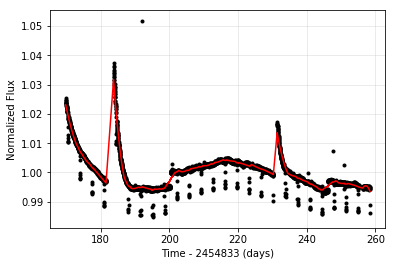

In [5]:
ax = lc.plot(marker='.',linestyle='none')   #plot() returns a matplotlib axis
trend.plot(ax, color='red');    #which we can pass to the next plot() to use the same plotting window

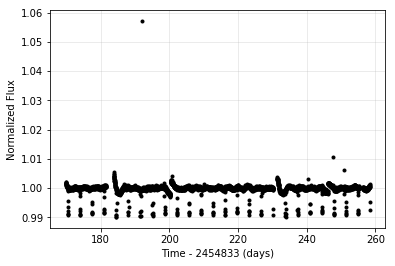

In [6]:
flat.plot(marker='.',linestyle='none');

## Challenge #2: Median Smooth Trend
Here is a start for the challenge and a general guideline on how to complete the median smooth.

1. Using given interval for smoothing.
    * The interval is the range of data points for which the median is for. For example, if you data is (10,11,20,9,11,12,8,18,9,2,7,9,11) and your interval is 5 data points then you will look at (10,11,20,9,11) and find the median. Next, will be (11,20,9,11,12) and so on until you get to the last interval (9,2,7,9,11).

    * A good interval to start with is taking the square root of the number of data points and rounding down to the nearest odd number.
    * Once the function is working try using different intervals to see how it changes the trend and detrend plot.
2. Making Trend Array.
    
    * The trend array will be the median for each interval you looked at.
    * For the example above, the trend array will look like. (10,11,11,11,11,11,11,9,8,9,9,9,11)
    * Note are that because the interval is 5 the first 2 and last to data points are unchanged. 
    * More importantly, note that the outliers like 20 and 2 are not in the trend.

3. Detrending
    
    * Lastly, detrending is simply subtracting the trend array from the original array.
    * Detrend array: (0,0,9,-2,0,1,-3,9,1,-7,-2,0,0)
    
Some other packages that might be helpful in this process are:

* copy.copy() - to make copies of arrays so that the original data remains unchanged
* statistics.median - to find the median, so that you wont have to make a median finder function
* .append() - works with non-numpy arrays to add a data point to end of an array.

These do not have to be used but may help with some problems encountered. You may also use any other python package that doesn't directly completely do all the work for you but will atleast help you with small tasks along the way.


In [7]:
def detrend(time,flux,interval):
    #
    #[code here]
    
    return() #place final arrays inside paratheses ex. (timeNew,fluxNew, trend)

To test your function uncomment the cell below by removing the '#' or by pressing 'ctrl/command' and '/' at the same time. I used the lightcurve .remove_NaN to help with the testing but if you completed the first challenge feel free to use the output from that function as your input instead.

In [8]:
# lc_noNaN = lc.remove_outliers() #use challenge one not complete
# interval = 1
# flatTime, flatFlux, trend = detrend(lc_noNaN.time,lc_noNaN.flux,interval)

## Part 2:
1. Plot the original flux with the trend similar to the to the example above. Make the lc.flux display as black dots and the trend display as a red line.

2. In a separate plot, plot the detrended flux as black dots.

Once you got it all working try out different intervals to see how it changes the shape of the trend and the final detrended graph.

In [9]:
#[Plotting code here]

# Creating .remove_outliers()
Finally, we want to remove the outlier values. These are values that are generally caused by some kind of solar activity such as a solar flare or some other anomaly. While these outliers may show interesting star behaivor is not useful for exoplanet analysis so we will be removing them. 

The accomplish removing the outliers in an efficient manner we will be using a guassian ditribution and using the various standard deviations or $\sigma$ to determine which values will be removed. In a guassian distribution, the standard deviation tells us the dispersion of the data from the mean, shown as 0 below. The first standard deviation (1$\sigma$) contains about 68% of the data. Then, the second standard deviation (2$\sigma$) contains about 68% + 26% of the data so 94%. This continues for several sigmas where each increase of sigma has fewer outliers.

![guassian](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/400px-Standard_deviation_diagram.svg.png)
([wikipedia](https://en.wikipedia.org/wiki/Standard_deviation))

# Challenge #3: Removing outliers
The function we will create will use the guassian curve to determine the limits of the filtered data. The function will taken in the time and flux data as well as a multiple of sigma and will return a filtered data set that is with the sigma limit.

Here is the basic outline of how you want to accomplish this process:

1. Find the standard deviation of the flux.
  
2. Find the mean of the flux.

3. Set your upper and lower limit using mean and stadard deviation.
    - This is done with the formula `limit = mean ± (std)(sigma)`
    - adding will set the upper limit and subtracting will set the lower limit.
    - NOTE: Allow the user to determine the value of sigma
    
4. Loop over data to find values that exceed limits

5. Remove values that exceed limits from both flux and time arrays 

In [10]:
def removing_outliers(time,flux,sigma):
#     [code Here]
    return() #place returned array of time and flux

## Part 2:
1. Plot new plot without the outliers.
2. Test out different values of sigma and see how it affects of outliers that are removed.

In [11]:
# [plotting code here]